## Predicting Insurance Premiums

In [446]:
import pandas as pd

file_path = r"C:\Users\pamir\OneDrive\Desktop\Data Science Projects\Predicting_Insurance_Premiums\premiums.csv"
def replace_slashes(file_path):
    file_path = file_path.replace("\\", "/")
    return file_path

file_path = replace_slashes(file_path)
df = pd.read_csv(file_path)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [448]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [449]:
# Summary of the dataset

print("Rows        : ", df.shape[0])
print("Columns     : ", df.shape[1])
print("\nFeatures    : ", df.columns.tolist())
print("\nMissing values: ", df.isnull().sum().values.sum())
print("\nUnique values:")
print(df.nunique())

Rows        :  1338
Columns     :  7

Features    :  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing values:  0

Unique values:
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [450]:
df_cat = df.select_dtypes(exclude=["int64", "float"])
df_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [451]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [452]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [453]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

#### Preprocessing & Exploratory Data Analysis

In [454]:
# Create a copy of the dataframe to keep the categorical variables intact

df_pure = df.copy()

In [455]:
# Replace categorical variables with integers

df.sex = df.sex.replace("female", 0)
df.sex = df.sex.replace("male", 1)

df.smoker = df.smoker.replace("no", 0)
df.smoker = df.smoker.replace("yes", 1)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [456]:
df.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


<AxesSubplot:>

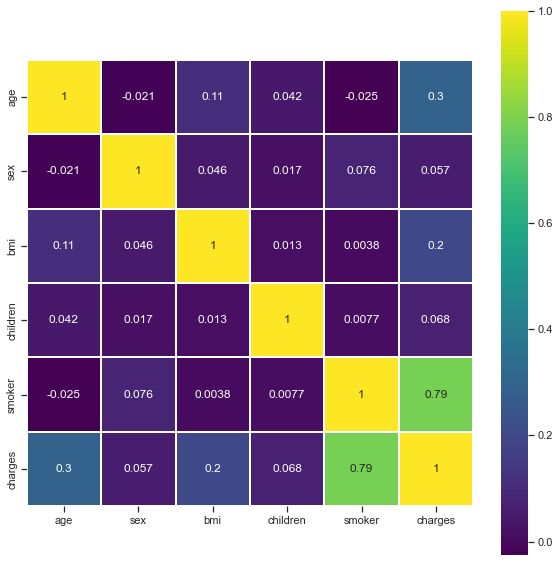

In [419]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df[["age", "sex", "bmi", "children", "smoker", "charges"]]
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df_corr.astype(float).corr(), linewidth=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [420]:
# One-hot encoding for those features that are not ordered and/or
# that have more than 2 categories

from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc = OneHotEncoder()
ToB_encoded = df[["region"]]

enc.fit(ToB_encoded)
cat = enc.categories_ # Record categories
T = enc.transform(ToB_encoded).toarray() # Convert to array format such that we can put into dataframe

In [421]:
# Once the one-hot encoding columns are ready, time to incorporate them back
# into the dataframe

df = df.drop(columns=["region"])
feat_names = enc.get_feature_names(input_features=None)

df_OneHot = pd.DataFrame(T, columns=feat_names)

df = pd.concat([df, df_OneHot], axis=1)
df.head()

C:\Users\pamir\miniconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,age,sex,bmi,children,smoker,charges,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


<AxesSubplot:>

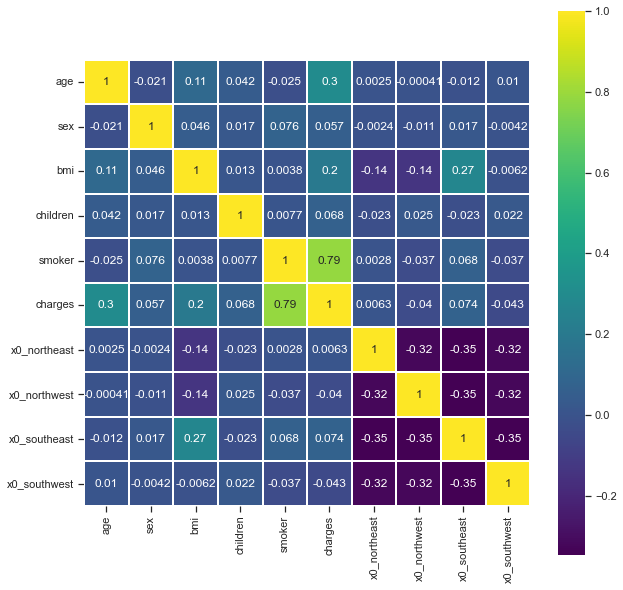

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).corr(), linewidth=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

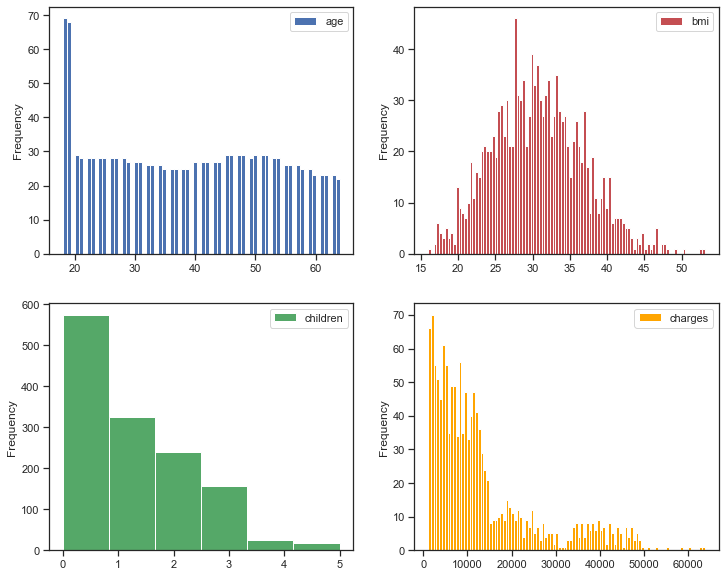

In [423]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="children", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="charges", bins=100, color="orange", ax=axes[1][1])
plt.show()

Text(0.5, 1.0, 'Distribution of Genders')

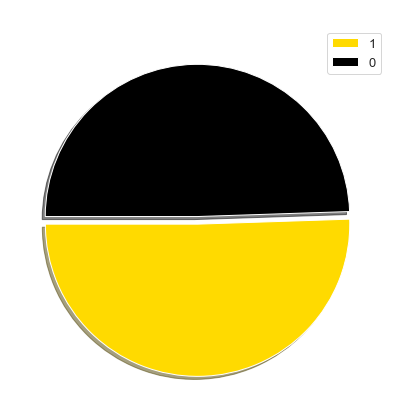

In [424]:
# Gender distribution

import matplotlib.pyplot as plt
from pylab import rcParams

labels = df['sex'].value_counts(sort=True).index
sizes = df['sex'].value_counts(sort=True)

colors = ['#ffda00', '#000000']
explode = (0.05, 0)

rcParams['figure.figsize'] = 7, 7

patches, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors,  autopct='%1.1f%%',
        shadow=True, startangle=180, textprops={'fontsize': 14}, pctdistance=1.1)

texts[0].set_color('white')
texts[1].set_color('white')

autotexts[0].set_color('white')
autotexts[1].set_color('white')

plt.legend(labels=labels, loc="best", fontsize=13)
plt.title("Distribution of Genders", color="white", fontsize=18)

Text(0.5, 1.0, 'Distribution of Smokers')

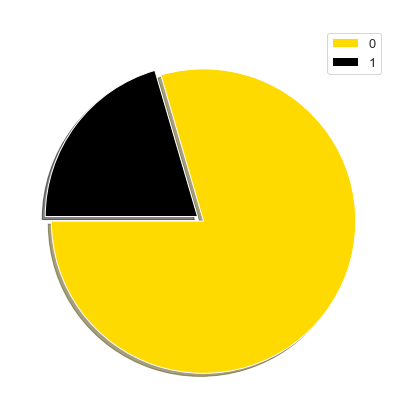

In [425]:
# Gender distribution

import matplotlib.pyplot as plt
from pylab import rcParams

labels = df['smoker'].value_counts(sort=True).index
sizes = df['smoker'].value_counts(sort=True)

colors = ['#ffda00', '#000000']
explode = (0.05, 0)

rcParams['figure.figsize'] = 7, 7

patches, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors,  autopct='%1.1f%%',
        shadow=True, startangle=180, textprops={'fontsize': 14}, pctdistance=1.2)

texts[0].set_color('white')
texts[1].set_color('white')

autotexts[0].set_color('white')
autotexts[1].set_color('white')

plt.legend(labels=labels, loc="best", fontsize=13)
plt.title("Distribution of Smokers", color="white", fontsize=18)

<AxesSubplot:title={'center':'Children vs Charges'}, xlabel='children', ylabel='charges'>

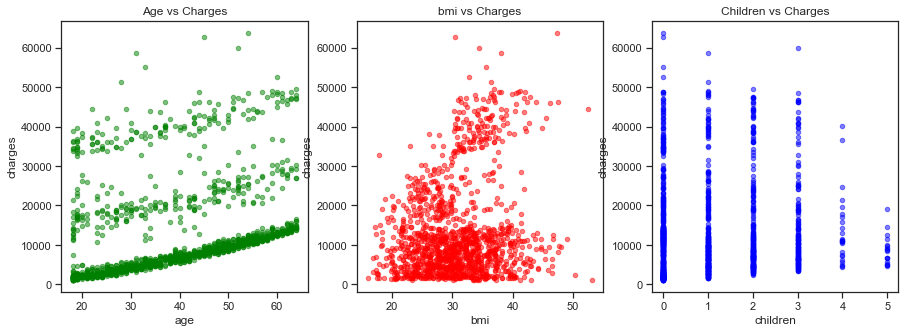

In [426]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
df_pure.plot(kind="scatter", x="age", y="charges", alpha=0.5, color="green", ax=axes[0], title="Age vs Charges")
df_pure.plot(kind="scatter", x="bmi", y="charges", alpha=0.5, color="red", ax=axes[1], title="bmi vs Charges")
df_pure.plot(kind="scatter", x="children", y="charges", alpha=0.5, color="blue", ax=axes[2], title="Children vs Charges")

<AxesSubplot:xlabel='bmi', ylabel='charges'>

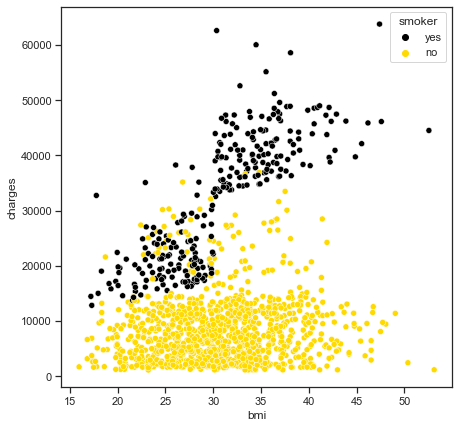

In [427]:
import seaborn as sns

pal = ['#000000', '#ffda00']
sns.scatterplot(x="bmi", y="charges", data=df_pure, palette=pal, hue="smoker")

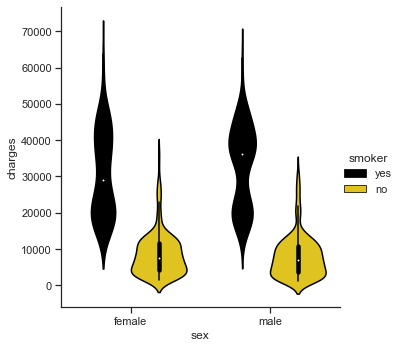

In [428]:
pal = ['#000000', '#ffda00']
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df_pure, palette=pal)

Text(0.5, 1.0, 'Smokers')

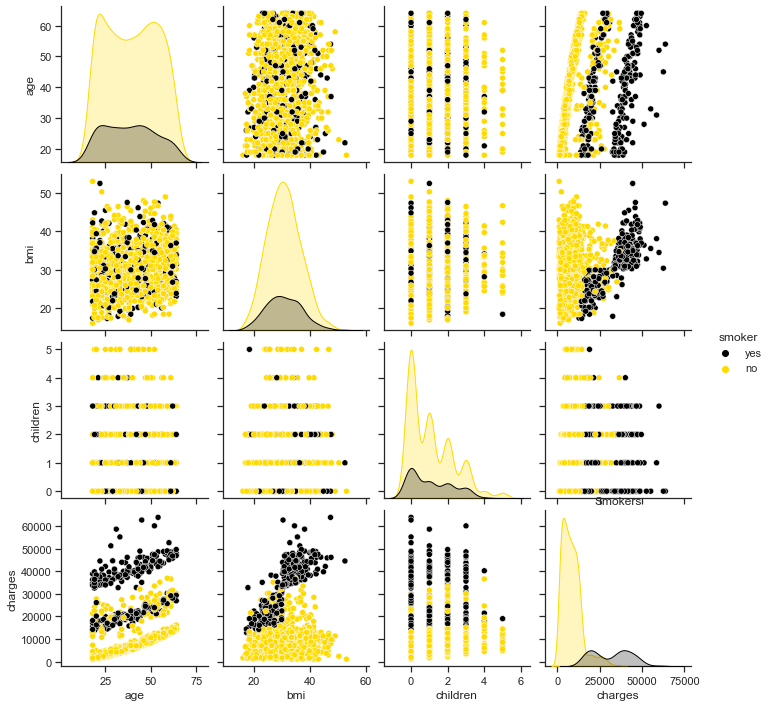

In [429]:
import seaborn as sns

sns.set(style="ticks")
pal = pal = ['#000000', '#ffda00']

sns.pairplot(df_pure, hue="smoker", palette=pal)
plt.title("Smokers")

### ML

In [430]:
df.head()

,age,sex,bmi,children,smoker,charges,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [431]:
from sklearn.preprocessing import StandardScaler

df = df.drop(["x0_northeast", "x0_northwest", "x0_southeast", "x0_southwest"], axis=1) # Removing these columns to improve model accuracy
df_num = df[["age", "bmi", "children"]]

sc = StandardScaler()
X_scaled = sc.fit_transform(df_num)

df_scaled = pd.DataFrame(X_scaled)
df_scaled = df_scaled.rename(columns={0: "age", 1: "bmi", 2: "children"})
df = df.drop(["age", "bmi", "children"], axis=1)

df = df.merge(df_scaled, left_index=True, right_index=True, how='left')
df.head()

,sex,smoker,charges,age,bmi,children
0,0,1,16884.92400,-1.438764,-0.453320,-0.908614
1,1,0,1725.55230,-1.509965,0.509621,-0.078767
2,1,0,4449.46200,-0.797954,0.383307,1.580926
3,1,0,21984.47061,-0.441948,-1.305531,-0.908614
4,1,0,3866.85520,-0.513149,-0.292556,-0.908614


In [432]:
X = df.drop(["charges"], axis=1)
y = df.charges

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Linear Regression

In [433]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test)) # Here, score is the R2 score, not MSE but close.

0.7652077247609825


In [434]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
764,9095.06825,8516.761620
887,5272.17580,6893.859056
890,29330.98315,36776.198772
1293,9301.89355,9464.380662
259,33750.29180,26789.922546
...,...,...
342,13217.09450,12325.644825
308,11944.59435,14267.744340
1128,14358.36437,7785.278314
503,32548.34050,26242.897358


Linear Regression w/ Polynomial Features

In [435]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=3)
X_train_poly = poly_feat.fit_transform(X_train)
X_test_poly = poly_feat.fit_transform(X_test)

poly_reg = LinearRegression(fit_intercept=False)
poly_reg.fit(X_train_poly, y_train)

LinearRegression(fit_intercept=False)

Decision Tree Regressor

In [436]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

Random Forest Regressor

In [437]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=42)

SVM Regressor

In [438]:
from sklearn.svm import SVR

svr = SVR(gamma='auto', kernel='linear', C=1000)
svr.fit(X_train, y_train)

SVR(C=1000, gamma='auto', kernel='linear')

SGD Regressor

In [439]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor()

Ridge Regression

In [458]:
from sklearn.linear_model import Ridge

rid = Ridge()
rid.fit(X_train, y_train)

Ridge()

In [440]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

Evaluating the Linear Regression Model

In [441]:
# Prediction with training dataset:
y_pred_MLR_train = lr.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = lr.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(lr, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  0.7441660615416086
Testing Accuracy for Multiple Linear Regression Model:  0.7652077247609825
RMSE for Training Data:  6092.540265209529
RMSE for Testing Data:  5952.148688048978
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.7472139272744504


Evaluating the Polynomial Regression Model

In [442]:
# Prediction with training dataset:
y_pred_PR_train = poly_reg.predict(X_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = poly_reg.predict(X_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(poly_reg, poly_feat.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8467489036839287
Testing Accuracy for Polynomial Regression Model:  0.8512382909371963
RMSE for Training Data:  4715.428073642479
RMSE for Testing Data:  4737.8079134643385
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.839164313556678


Evaluating the Decision Tree Regression Model

In [443]:
# Prediction with training dataset:
y_pred_DTR_train = dtr.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = dtr.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(dtr, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.8801887654872605
Testing Accuracy for Decision Tree Regression Model:  0.8465347494454458
RMSE for Training Data:  4169.347574788716
RMSE for Testing Data:  4812.124952785749
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.849297640335225


Evaluating the Random Forest Regression Model

In [444]:
# Prediction with training dataset:
y_pred_RFR_train = rfr.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = rfr.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(rfr, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8883308251790178
Testing Accuracy for Random Forest Regression Model:  0.8584916711925326
RMSE for Training Data:  4025.1862754686895
RMSE for Testing Data:  4620.860635362967
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8573856897291482


Evaluating the Support Vector Regression Model

In [445]:
# Prediction with training dataset:
y_pred_SVR_train = svr.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = svr.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(svr, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.6439622110898994
Testing Accuracy for Support Vector Regression Model:  0.6567287371670708
RMSE for Training Data:  7187.326554945187
RMSE for Testing Data:  7196.984929585849
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  0.7058085087674479


Evaluating the Stochastic Gradient Descent Regressor Model

In [457]:
# Prediction with training dataset:
y_pred_SGD_train = sgd.predict(X_train)

# Prediction with testing dataset:
y_pred_SGD_test = sgd.predict(X_test)

# Find training accuracy for this model:
accuracy_SGD_train = r2_score(y_train, y_pred_SGD_train)
print("Training Accuracy for SGD Regression Model: ", accuracy_SGD_train)

# Find testing accuracy for this model:
accuracy_SGD_test = r2_score(y_test, y_pred_SGD_test)
print("Testing Accuracy for SGD Regression Model: ", accuracy_SGD_test)

# Find RMSE for training data:
RMSE_SGD_train = sqrt(mean_squared_error(y_train, y_pred_SGD_train))
print("RMSE for Training Data: ", RMSE_SGD_train)

# Find RMSE for testing data:
RMSE_SGD_test = sqrt(mean_squared_error(y_test, y_pred_SGD_test))
print("RMSE for Testing Data: ", RMSE_SGD_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SGD = cross_val_predict(sgd, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SGD = r2_score(y, y_pred_cv_SGD)
print("Accuracy for 10-Fold Cross Predicted SGD Regression Model: ", accuracy_cv_SGD)

Training Accuracy for SGD Regression Model:  0.7441566587991477
Testing Accuracy for SGD Regression Model:  0.7651857972672453
RMSE for Training Data:  6092.652224672441
RMSE for Testing Data:  5952.42662022507
Accuracy for 10-Fold Cross Predicted SGD Regression Model:  0.7471462372538404


Evaluating the Ridge Regression Model

In [459]:
# Prediction with training dataset:
y_pred_RID_train = rid.predict(X_train)

# Prediction with testing dataset:
y_pred_RID_test = rid.predict(X_test)

# Find training accuracy for this model:
accuracy_RID_train = r2_score(y_train, y_pred_RID_train)
print("Training Accuracy for Ridge Regression Model: ", accuracy_RID_train)

# Find testing accuracy for this model:
accuracy_RID_test = r2_score(y_test, y_pred_RID_test)
print("Testing Accuracy for Ridge Regression Model: ", accuracy_RID_test)

# Find RMSE for training data:
RMSE_RID_train = sqrt(mean_squared_error(y_train, y_pred_RID_train))
print("RMSE for Training Data: ", RMSE_RID_train)

# Find RMSE for testing data:
RMSE_RID_test = sqrt(mean_squared_error(y_test, y_pred_RID_test))
print("RMSE for Testing Data: ", RMSE_RID_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RID = cross_val_predict(rid, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RID = r2_score(y, y_pred_cv_RID)
print("Accuracy for 10-Fold Cross Predicted Ridge Regression Model: ", accuracy_cv_RID)

Training Accuracy for Ridge Regression Model:  0.7441425893731113
Testing Accuracy for Ridge Regression Model:  0.764963595732712
RMSE for Training Data:  6092.819746994856
RMSE for Testing Data:  5955.242305058115
Accuracy for 10-Fold Cross Predicted Ridge Regression Model:  0.7472038319552978


In [389]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,0.744166,0.765208,6092.540265,5952.148688,0.747214
Polynomial Regression,fit_intercept=False,0.846749,0.851238,4715.428074,4737.807913,0.839164
Decision Tree Regression,max_depth=5,0.880189,0.846535,4169.347575,4812.124953,0.849298
Random Forest Regression,"n_estimators=400, max_depth=5",0.888331,0.858492,4025.186275,4620.860635,0.857386
Support Vector Regression,"kernel=”linear”, C=1000",0.643962,0.656729,7187.326555,7196.984930,0.705809


### Predicting Pamir's Insurance Premium

In [390]:
pamir = {'age': [28],
         'sex': ['male'],
         'bmi': [24.3],
         'children': [0],
         'smoker': ['no']}

df_pamir = pd.DataFrame(pamir)
df_pamir

,age,sex,bmi,children,smoker
0,28,male,24.3,0,no


In [391]:
# Convert categorical variables as before

df_pamir['sex'] = df_pamir['sex'].map(lambda s: 1 if s=='male' else 0)
df_pamir['smoker'] = df_pamir['smoker'].map(lambda s:1 if s=='yes' else 0)
df_pamir

,age,sex,bmi,children,smoker
0,28,1,24.3,0,0


In [392]:
# Scale pamir

df_pamir_num = df_pamir.drop(["sex", "smoker"], axis=1)

pamir_scaled = sc.transform(df_pamir_num)

df_pamir_scaled = pd.DataFrame(pamir_scaled)
df_pamir_scaled = df_pamir_scaled.rename(columns={0: "age", 1: "bmi", 2: "children"})
df_pamir = df_pamir.drop(["age", "bmi", "children"], axis=1)

df_pamir = df_pamir.merge(df_pamir_scaled, left_index=True, right_index=True, how='left')

df_pamir

,sex,smoker,age,bmi,children
0,1,0,-0.797954,-1.04388,-0.908614


In [393]:
rfr.predict(df_pamir) # Pamir's predicted insurance premium using the Random Forest Regressoe

array([5165.06668336])

In [394]:
print(sc.mean_)
print(sc.var_)
print(sc.scale_)

[39.20702541 30.66339686  1.09491779]
[197.25385199  37.16008997   1.45212664]
[14.04470904  6.09590764  1.20504217]


### Ensemble All Models

In [403]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(estimators=[
                                         ('dtr', dtr), ('rfr', rfr),
                                         ('svr', svr), ])

voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('dtr',
                             DecisionTreeRegressor(max_depth=5,
                                                   random_state=42)),
                            ('rfr',
                             RandomForestRegressor(max_depth=5,
                                                   n_estimators=400,
                                                   random_state=42)),
                            ('svr',
                             SVR(C=1000, gamma='auto', kernel='linear'))])

In [405]:
for reg in (dtr, rfr, svr, voting_reg):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__, r2_score(y_test, y_pred))

DecisionTreeRegressor 0.8465347494454458
RandomForestRegressor 0.8584916711925326
SVR 0.6567287371670708
VotingRegressor 0.8458577674921912


In [406]:
# Ensembling doesn't work well in this case (or I need to tweak things a bit)